<a href="https://colab.research.google.com/github/Maisha777/diabetes/blob/main/Predicting%20diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
jk = pd.read_csv("/content/diabetes.csv")

# **Dataset** **Information**

In [4]:
jk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
jk.shape

(768, 9)

In [6]:
jk.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
jk.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Dataset Processing**

In [8]:
jk.isna() .sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
jk.duplicated().sum()

0

# **Dataset Visualization**

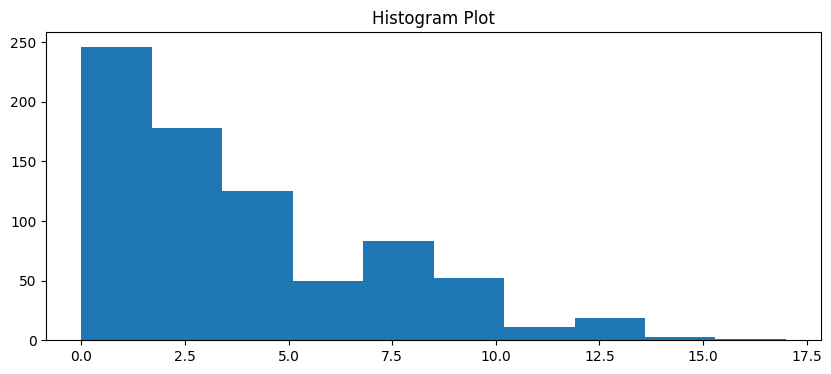

In [10]:
def hist_plots(jk):
    plt.figure(figsize=(10, 4))
    plt.hist(jk)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(jk['Pregnancies'])

<Axes: xlabel='Pregnancies', ylabel='Count'>

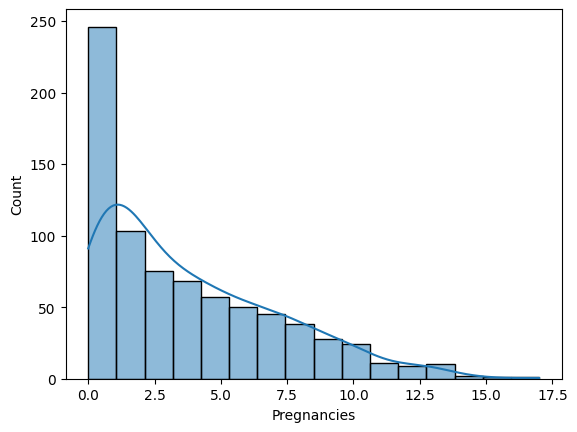

In [11]:
sns.histplot(jk['Pregnancies'], kde = True, bins='auto')

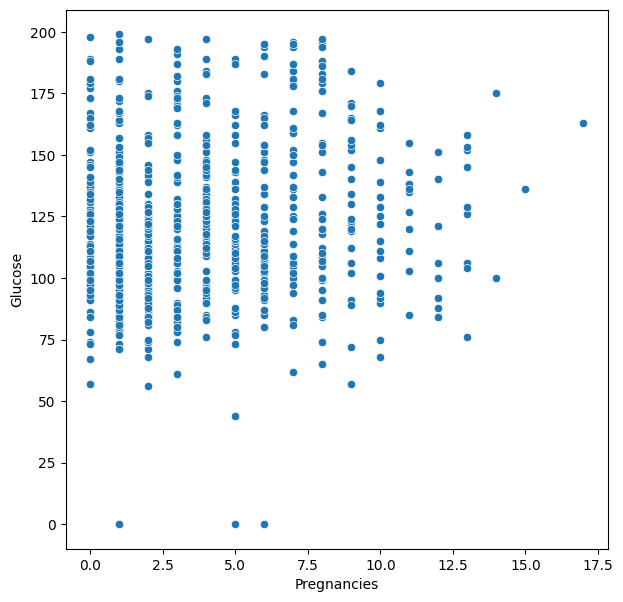

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Pregnancies", y="Glucose", data=jk)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

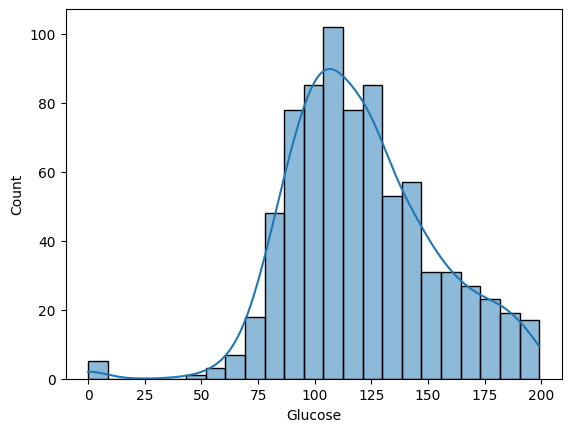

In [13]:
sns.histplot(jk['Glucose'], kde = True, bins='auto')

<Axes: xlabel='BloodPressure', ylabel='Count'>

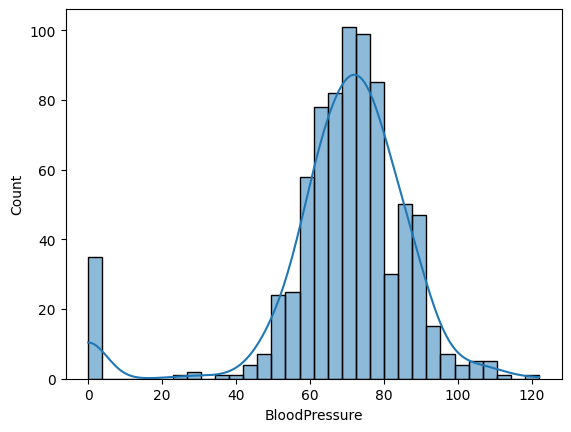

In [14]:
sns.histplot(jk['BloodPressure'], kde = True, bins='auto')

<Axes: xlabel='SkinThickness', ylabel='Count'>

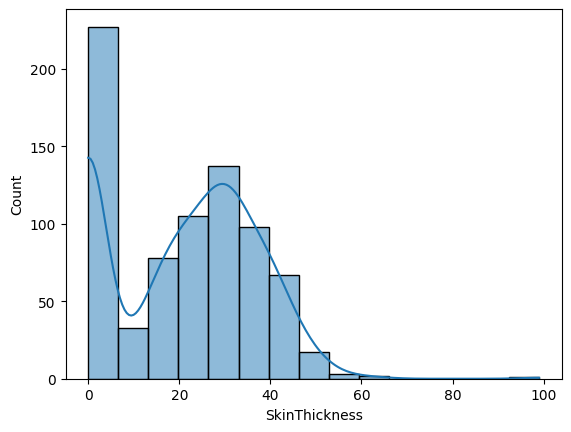

In [15]:
sns.histplot(jk['SkinThickness'], kde = True, bins='auto')

<Axes: xlabel='Insulin', ylabel='Count'>

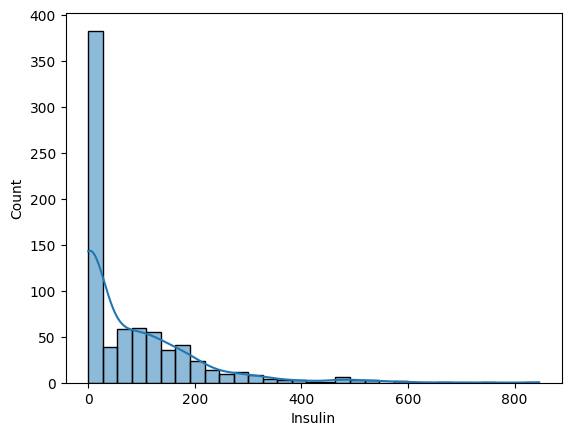

In [16]:
sns.histplot(jk['Insulin'], kde = True, bins='auto')

<Axes: xlabel='BMI', ylabel='Count'>

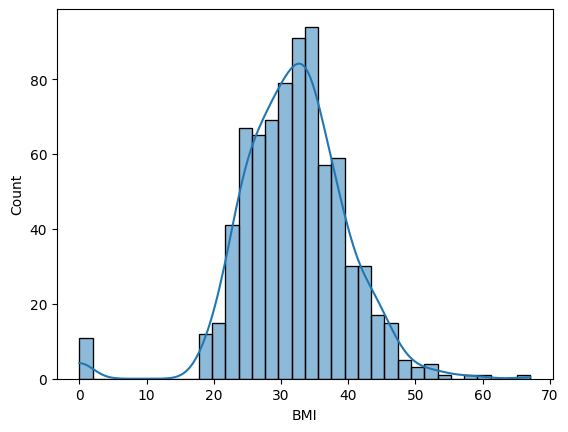

In [17]:
sns.histplot(jk['BMI'], kde = True, bins='auto')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

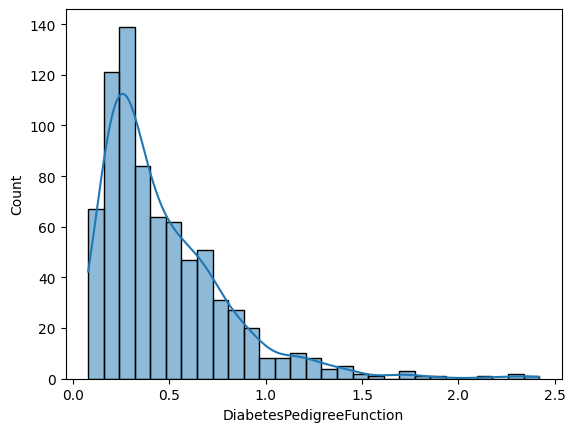

In [18]:
sns.histplot(jk['DiabetesPedigreeFunction'], kde = True, bins='auto')

<Axes: xlabel='Age', ylabel='Count'>

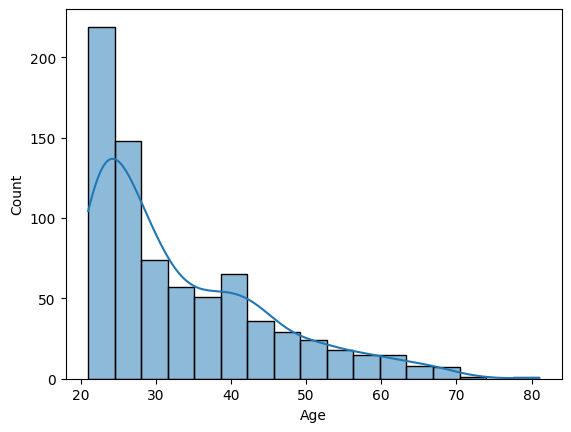

In [19]:
sns.histplot(jk['Age'], kde = True, bins='auto')

<Axes: xlabel='Outcome', ylabel='Count'>

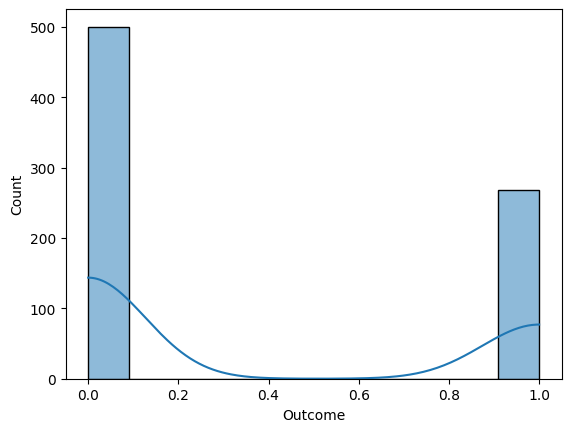

In [22]:
sns.histplot(jk['Outcome'], kde = True, bins='auto')

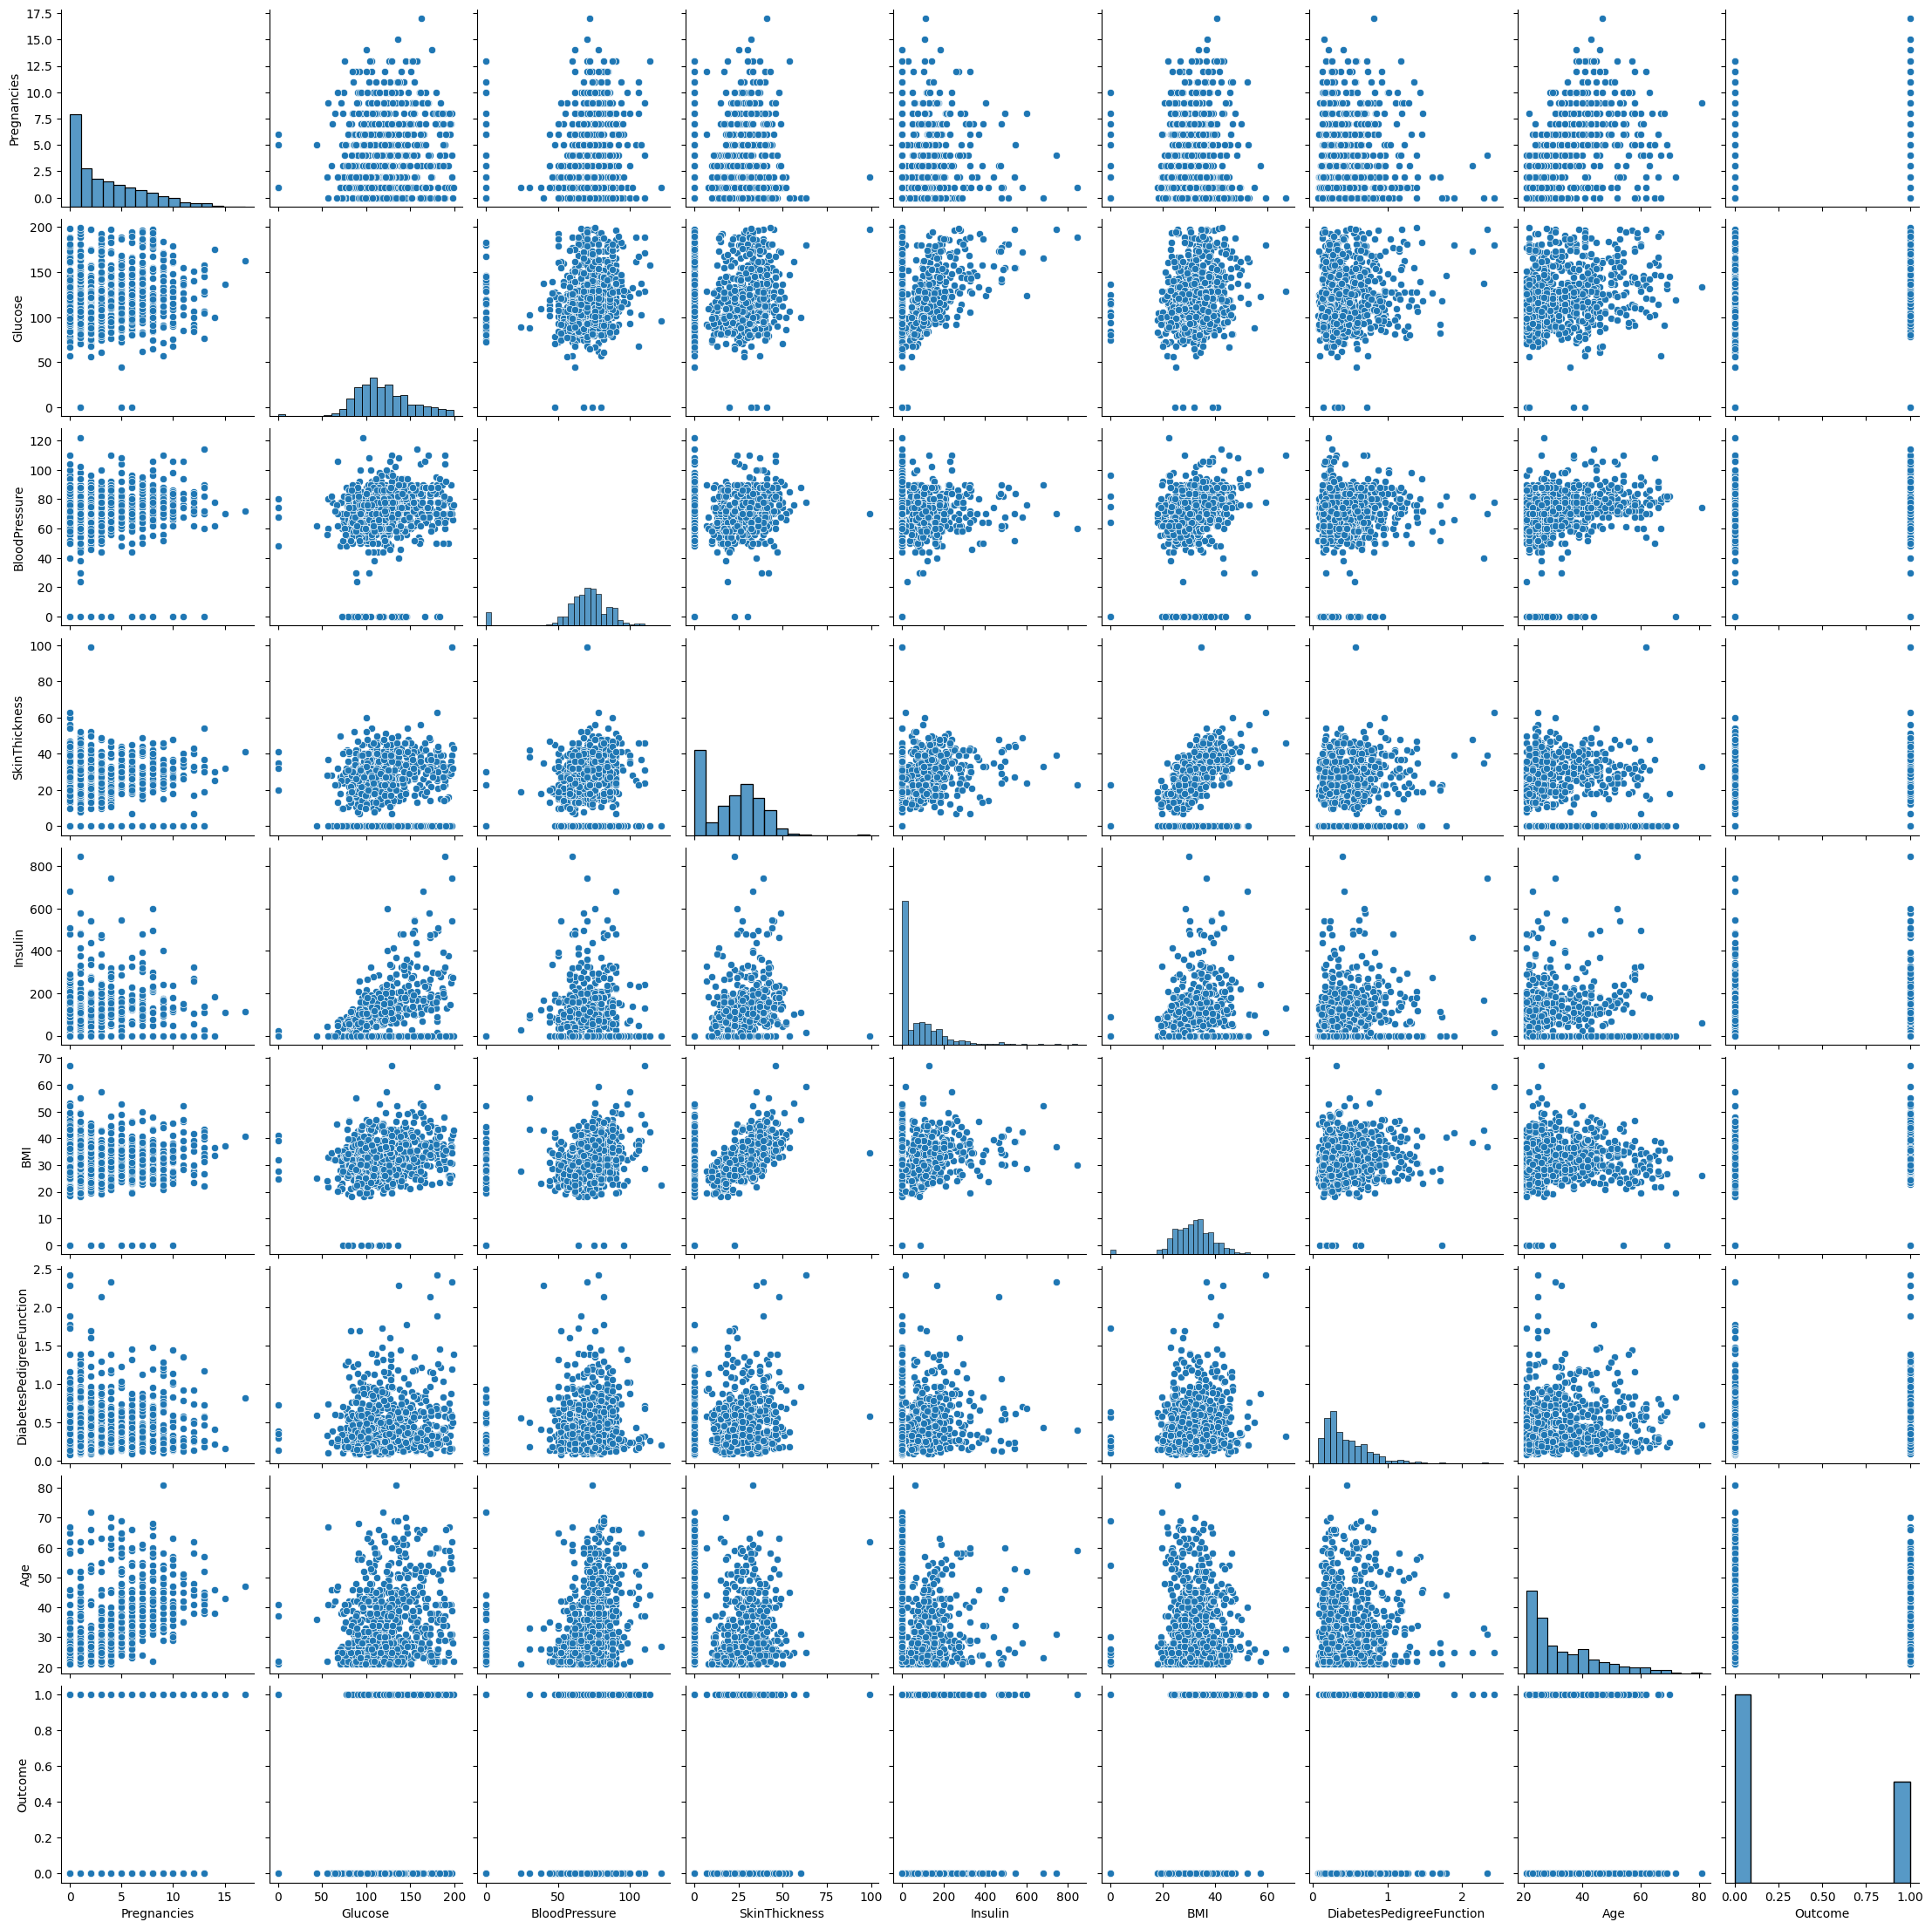

In [21]:
sns.pairplot(jk)

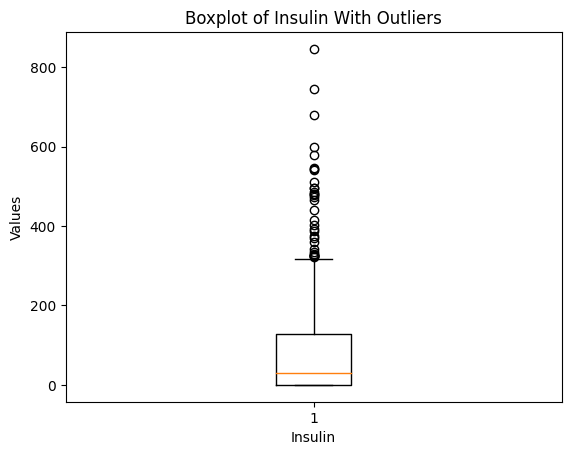

In [23]:
plt.boxplot(jk['Insulin'])
plt.xlabel('Insulin')
plt.ylabel('Values')
plt.title('Boxplot of Insulin With Outliers')
plt.show()

In [24]:
Q1 = np.percentile(jk['Insulin'], 25)
Q3 = np.percentile(jk['Insulin'], 75)
IQR = Q3 - Q1
feature_name = 'Insulin'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 318.125 will be considered as outliers
Values less than: -190.875 will be considered as outliers


In [25]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index


In [26]:
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

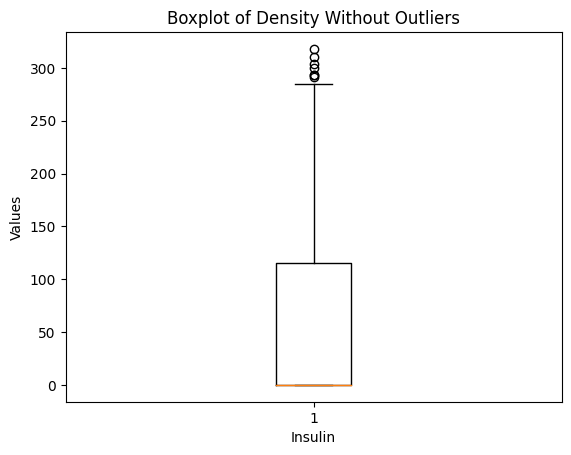

In [27]:
plt.boxplot(jk['Insulin'])
plt.xlabel('Insulin')
plt.ylabel('Values')
plt.title('Boxplot of Density Without Outliers')
plt.show()

In [28]:
jk.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

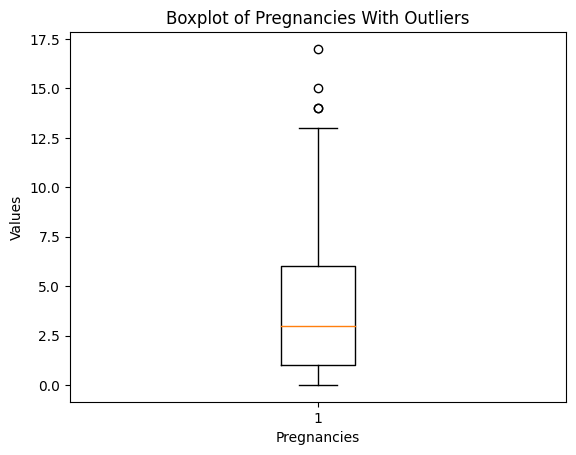

In [29]:
plt.boxplot(jk['Pregnancies'])
plt.xlabel('Pregnancies')
plt.ylabel('Values')
plt.title('Boxplot of Pregnancies With Outliers')
plt.show()

In [32]:
Q1 = np.percentile(jk['Pregnancies'], 25)
Q3 = np.percentile(jk['Pregnancies'], 75)
IQR = Q3 - Q1
feature_name = 'Pregnancies'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 16.0 will be considered as outliers
Values less than: -8.0 will be considered as outliers


In [33]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

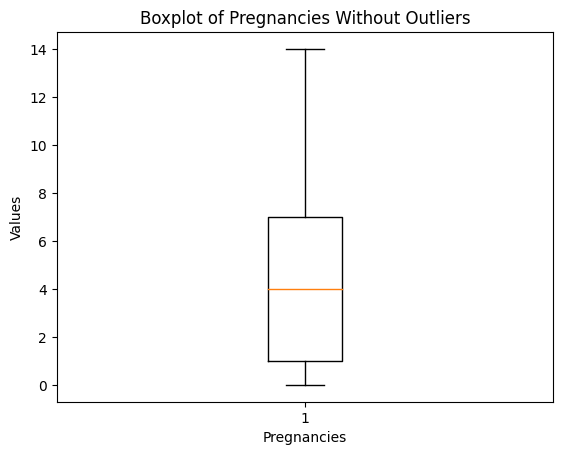

In [34]:
plt.boxplot(jk['Pregnancies'])
plt.xlabel('Pregnancies')
plt.ylabel('Values')
plt.title('Boxplot of Pregnancies Without Outliers')
plt.show()

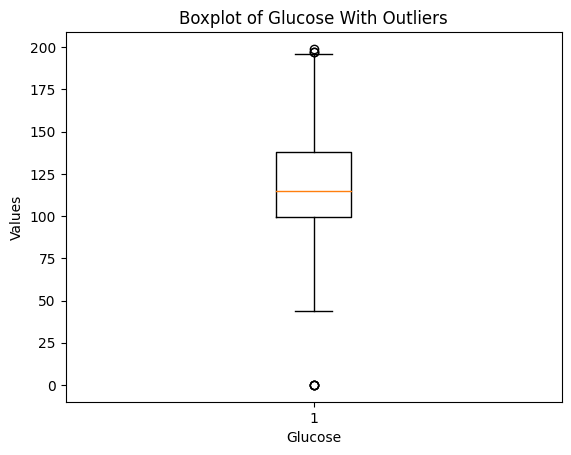

In [35]:
plt.boxplot(jk['Glucose'])
plt.xlabel('Glucose')
plt.ylabel('Values')
plt.title('Boxplot of Glucose With Outliers')
plt.show()

In [36]:
Q1 = np.percentile(jk['Glucose'], 25)
Q3 = np.percentile(jk['Glucose'], 75)
IQR = Q3 - Q1
feature_name = 'Glucose'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 196.125 will be considered as outliers
Values less than: 41.125 will be considered as outliers


In [37]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

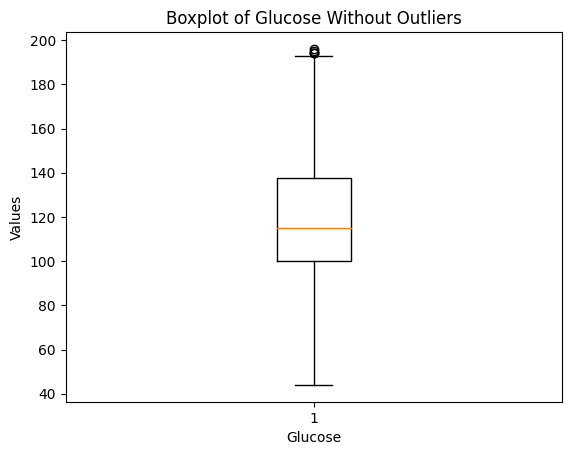

In [38]:
plt.boxplot(jk['Glucose'])
plt.xlabel('Glucose')
plt.ylabel('Values')
plt.title('Boxplot of Glucose Without Outliers')
plt.show()

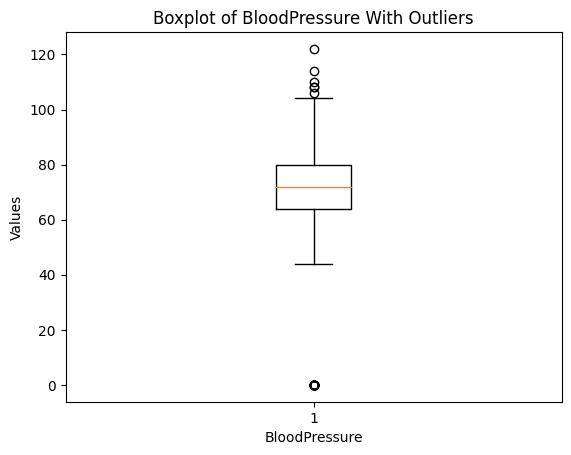

In [39]:
plt.boxplot(jk['BloodPressure'])
plt.xlabel('BloodPressure')
plt.ylabel('Values')
plt.title('Boxplot of BloodPressure With Outliers')
plt.show()

In [40]:
Q1 = np.percentile(jk['BloodPressure'], 25)
Q3 = np.percentile(jk['BloodPressure'], 75)
IQR = Q3 - Q1
feature_name = 'BloodPressure'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 104.0 will be considered as outliers
Values less than: 40.0 will be considered as outliers


In [41]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

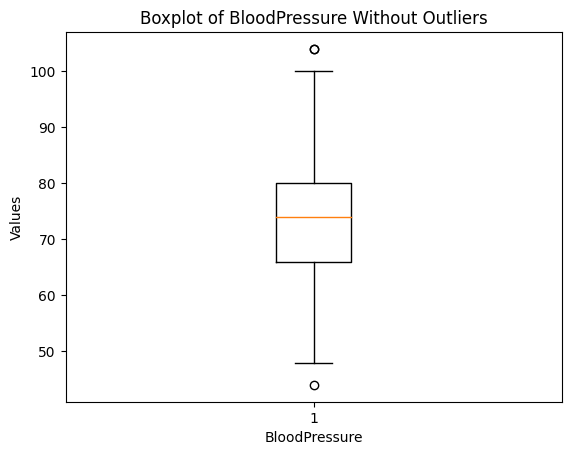

In [42]:
plt.boxplot(jk['BloodPressure'])
plt.xlabel('BloodPressure')
plt.ylabel('Values')
plt.title('Boxplot of BloodPressure Without Outliers')
plt.show()

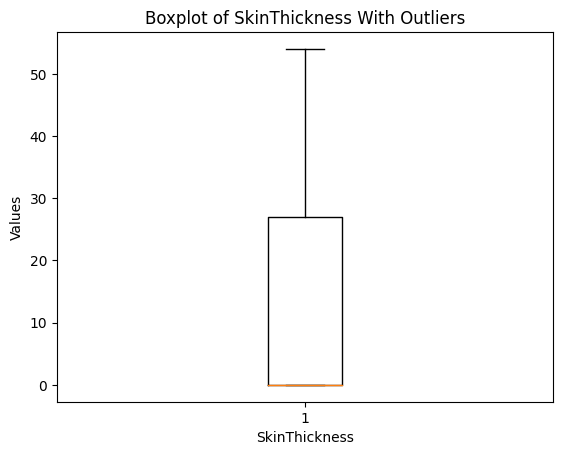

In [43]:
plt.boxplot(jk['SkinThickness'])
plt.xlabel('SkinThickness')
plt.ylabel('Values')
plt.title('Boxplot of SkinThickness With Outliers')
plt.show()

In [44]:
Q1 = np.percentile(jk['SkinThickness'], 25)
Q3 = np.percentile(jk['SkinThickness'], 75)
IQR = Q3 - Q1
feature_name = 'SkinThickness'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 67.5 will be considered as outliers
Values less than: -40.5 will be considered as outliers


In [45]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

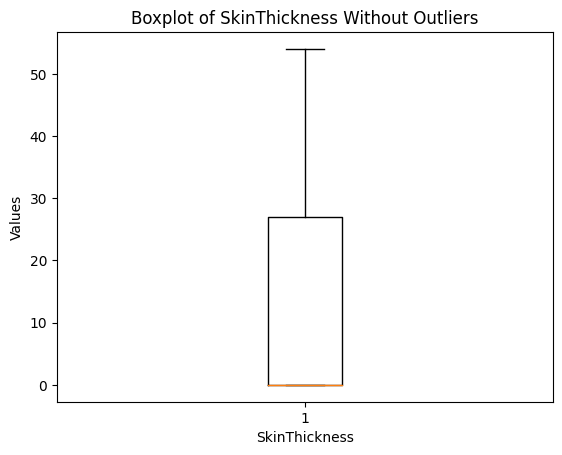

In [46]:
plt.boxplot(jk['SkinThickness'])
plt.xlabel('SkinThickness')
plt.ylabel('Values')
plt.title('Boxplot of SkinThickness Without Outliers')
plt.show()

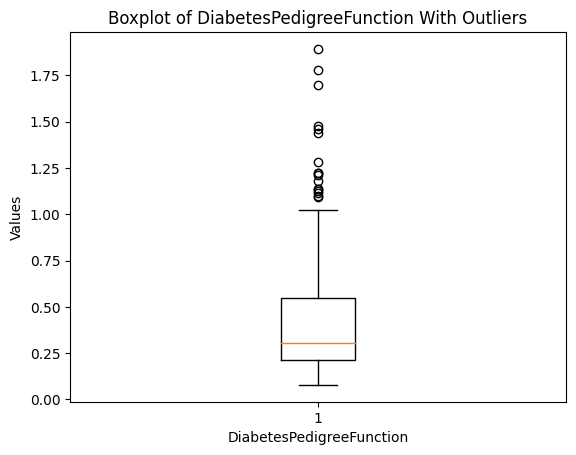

In [47]:
plt.boxplot(jk['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Values')
plt.title('Boxplot of DiabetesPedigreeFunction With Outliers')
plt.show()

In [48]:
Q1 = np.percentile(jk['DiabetesPedigreeFunction'], 25)
Q3 = np.percentile(jk['DiabetesPedigreeFunction'], 75)
IQR = Q3 - Q1
feature_name = 'DiabetesPedigreeFunction'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 1.047375 will be considered as outliers
Values less than: -0.2916249999999999 will be considered as outliers


In [49]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

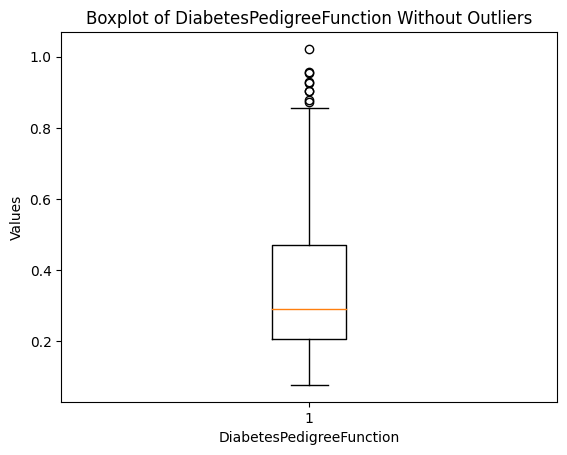

In [50]:
plt.boxplot(jk['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Values')
plt.title('Boxplot of DiabetesPedigreeFunction Without Outliers')
plt.show()

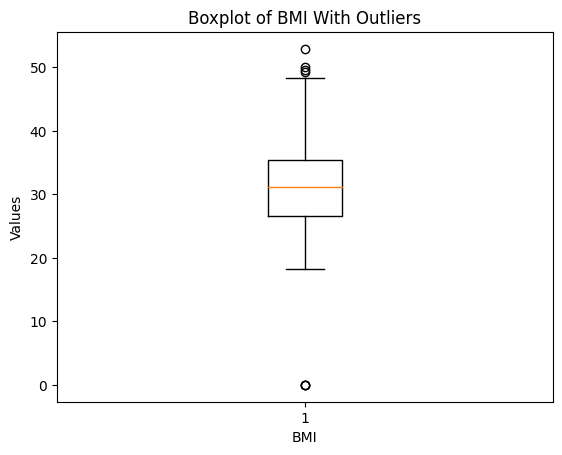

In [51]:
plt.boxplot(jk['BMI'])
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Boxplot of BMI With Outliers')
plt.show()

In [52]:
Q1 = np.percentile(jk['BMI'], 25)
Q3 = np.percentile(jk['BMI'], 75)
IQR = Q3 - Q1
feature_name = 'BMI'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 48.599999999999994 will be considered as outliers
Values less than: 13.400000000000006 will be considered as outliers


In [53]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

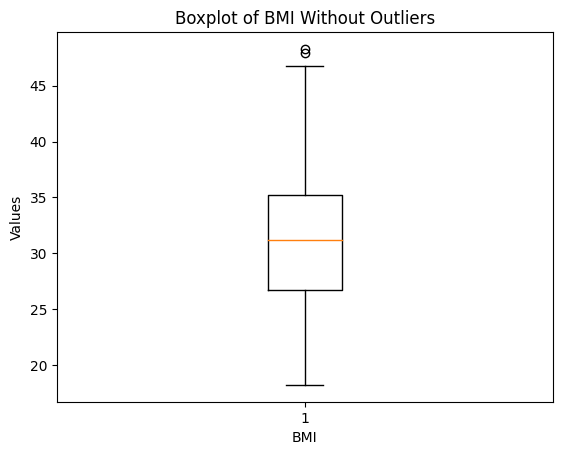

In [54]:
plt.boxplot(jk['BMI'])
plt.xlabel('BMI')
plt.ylabel('Values')
plt.title('Boxplot of BMI Without Outliers')
plt.show()

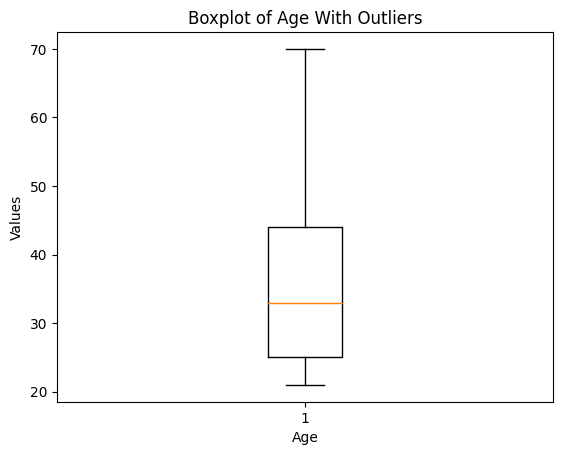

In [55]:
plt.boxplot(jk['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Boxplot of Age With Outliers')
plt.show()

In [56]:
Q1 = np.percentile(jk['Age'], 25)
Q3 = np.percentile(jk['Age'], 75)
IQR = Q3 - Q1
feature_name = 'Age'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Values greater than:", upper_bound, "will be considered as outliers")
print("Values less than:", lower_bound, "will be considered as outliers")

Values greater than: 72.5 will be considered as outliers
Values less than: -3.5 will be considered as outliers


In [57]:
outliers_indices= jk[(jk[feature_name] < lower_bound) | (jk[feature_name] > upper_bound)].index
jk_without_outliers = jk.drop(outliers_indices, inplace = True)

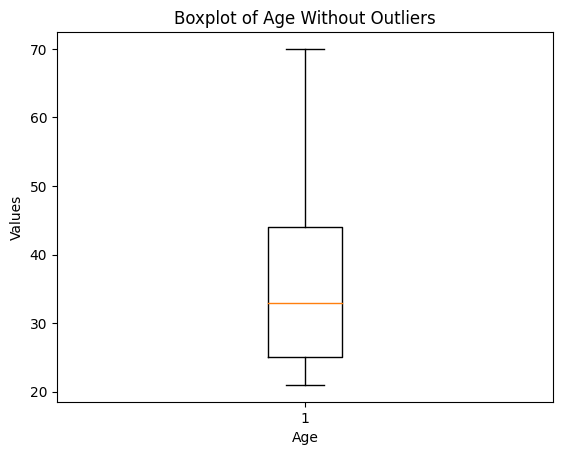

In [61]:
plt.boxplot(jk['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Boxplot of Age Without Outliers')
plt.show()

In [62]:
jk.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.091958,0.139200,-0.034911,NaN,0.117664,0.002234,0.406259,0.188852
Glucose,0.091958,1.000000,0.263311,-0.106047,NaN,0.199279,0.022656,0.229520,0.460473
BloodPressure,0.139200,0.263311,1.000000,0.021523,NaN,0.284199,0.142512,0.322530,0.137492
SkinThickness,-0.034911,-0.106047,0.021523,1.000000,NaN,0.209329,0.005079,-0.157186,-0.021723
Insulin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,0.117664,0.199279,0.284199,0.209329,NaN,1.000000,0.145173,0.034902,0.307372
DiabetesPedigreeFunction,0.002234,0.022656,0.142512,0.005079,NaN,0.145173,1.000000,0.055448,0.166665
Age,0.406259,0.229520,0.322530,-0.157186,NaN,0.034902,0.055448,1.000000,0.179182
Outcome,0.188852,0.460473,0.137492,-0.021723,NaN,0.307372,0.166665,0.179182,1.000000


<Axes: >

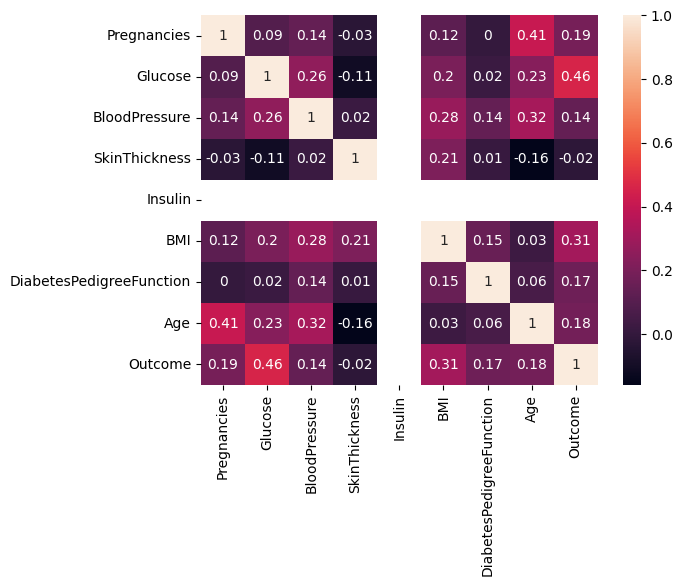

In [64]:
sns.heatmap(round(jk.corr(), 2), annot = True)